You can download the data used form this link: https://statso.io/forecasting-website-traffic-case-study/#google_vignette

In [41]:
import pandas as pd
data = pd.read_csv("Web_traffic Data\Forecasting Web Traffic Data.csv", on_bad_lines='skip')
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\amrk6\AppData\Local\Temp\ipykernel_14132\369990536.py:2: SyntaxWarning: invalid escape sequence '\F'
  data = pd.read_csv("Web_traffic Data\Forecasting Web Traffic Data.csv", on_bad_lines='skip')


,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [6]:
import matplotlib.pyplot as plt

In [43]:
data["Date"] = pd.to_datetime(data["Date"],format= "%d/%m/%Y")
data.head()

,Date,Views
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401
3,2021-06-04,7054
4,2021-06-05,7973


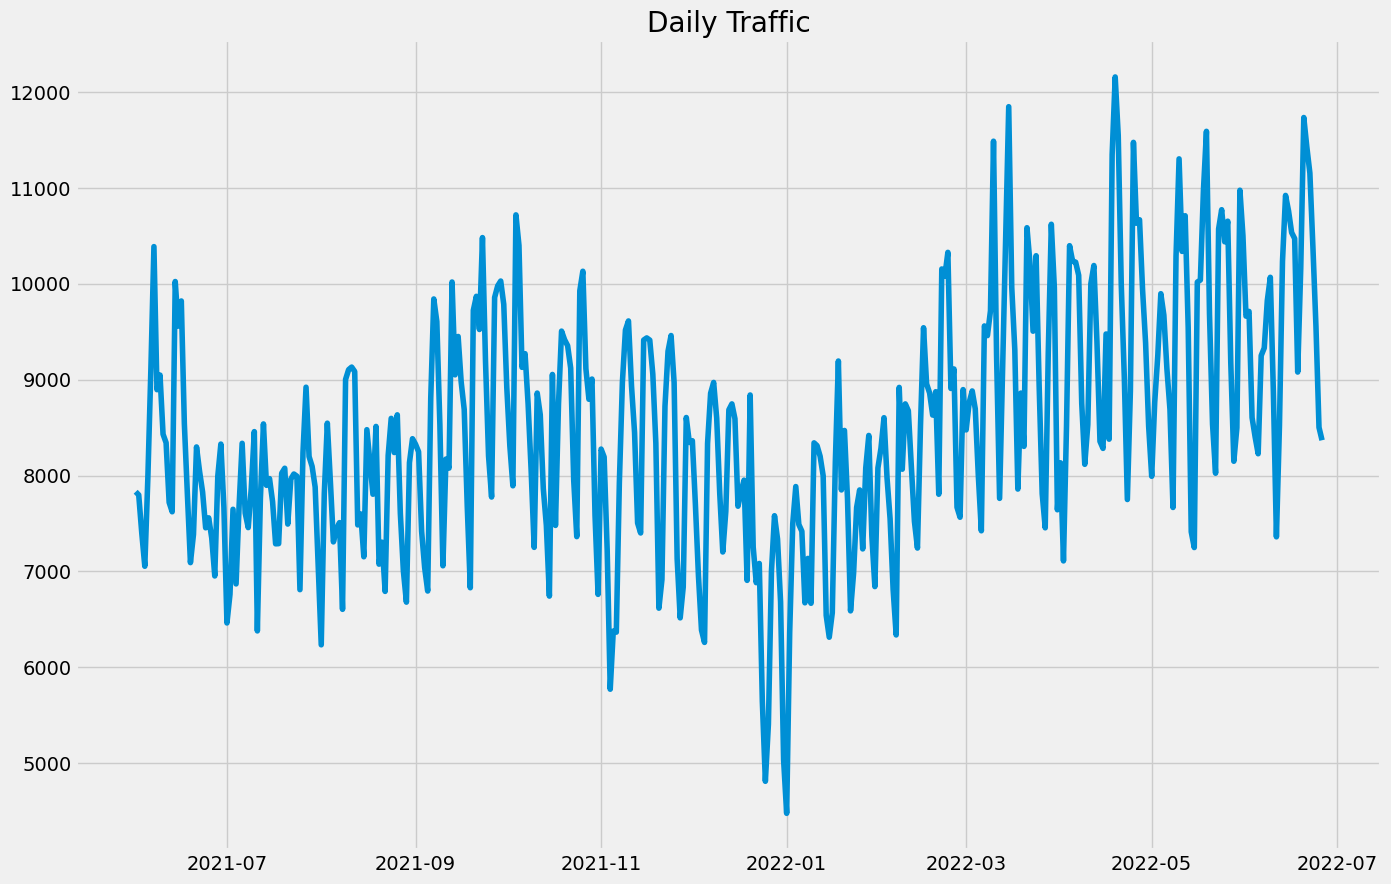

In [47]:
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic")
plt.show()

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

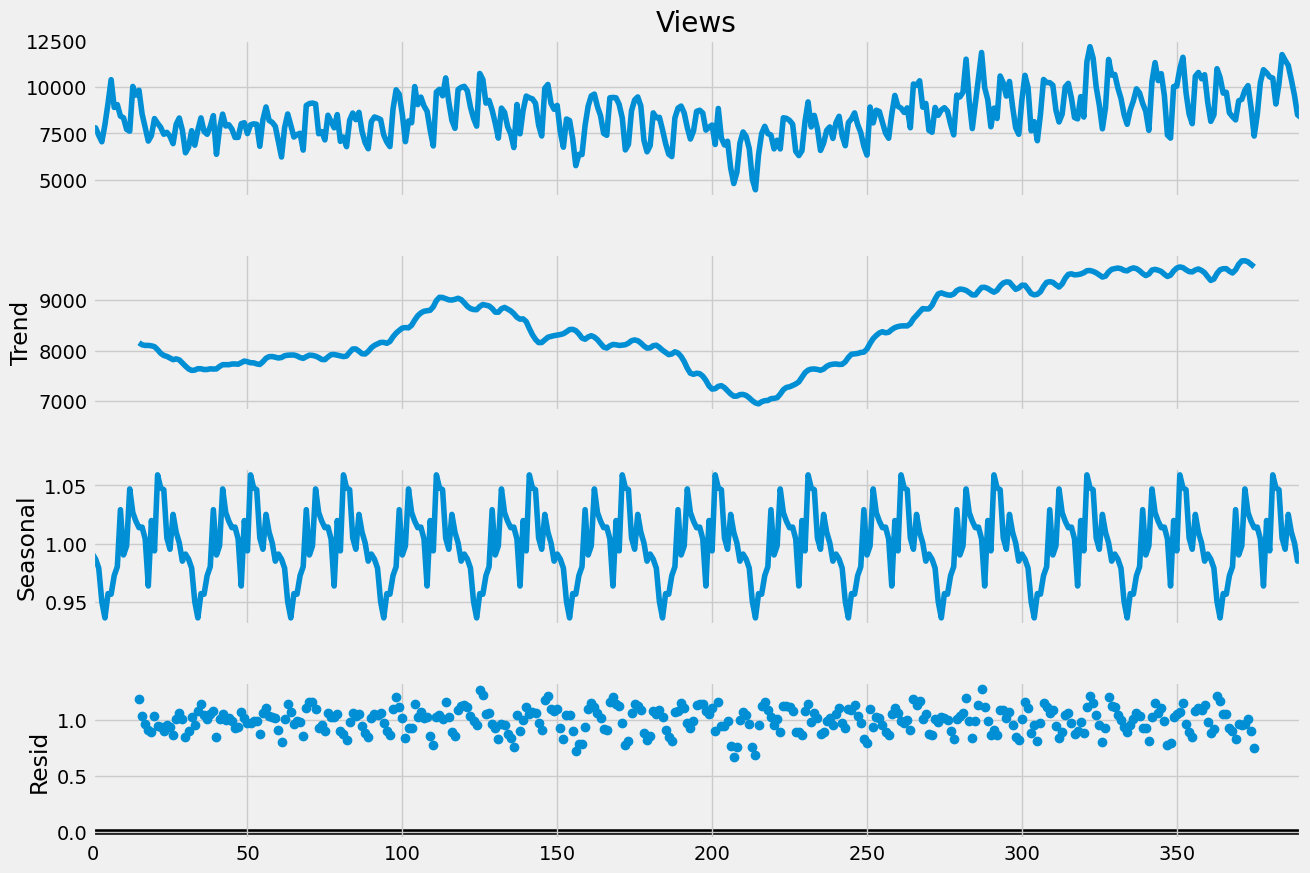

In [55]:
# Decompose the time series
result = seasonal_decompose(data['Views'], model='multiplicative', period=30)

# Plot the decomposition
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()

From the above data we can see that the traffic for this website is seasonal